This file contains a demo of our clustering method for the IHSAA realignment project. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import requests
import json

Alrighty. We now have a shape file and all neccessary packages. Let's see if we can make a map.

<AxesSubplot:>

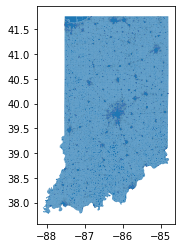

In [7]:
# reading the shape file for Indiana
indiana = gpd.read_file('indianaShapeFile/tl_2010_18_tabblock10.shp')

#plotting the map of Indiana
indiana['geometry'].plot()

Great! We can make a map of Indiana. But can we see how our data looks on it?

A good place to start would be reading the data. We'll start with the centroids

In [2]:
# reading centroids from txt file
text_file = open("centroids.txt", "r")
lines = text_file.readlines()
text_file.close()

x = np.array(lines)[0]
data = x.split(", ")
k = len(data)
print(k)
centroids = np.zeros((k,2))
for i in range(k):
    temp = tuple(map(float, data[i].split(',')))
    centroids[i][0] = temp[0]
    centroids[i][1] = temp[1]

16


Now, to read in the groups themselves. These are made using the output of kMeansTesting2 when run on all of the schools. (Also, you can ignore the warning, it doesn't make a difference for our purposes here.)

In [3]:
# reading groups from txt file
text_file = open("groups.txt", "r")
lines = text_file.readlines()
text_file.close()

k = len(lines)
numGroups = k
x = []
data = []
for i in range(k):
    x.append(lines[i].split(", "))
temp = []
groups = []
for i in range(k):
    l = len(x[i])
    tempgroup = []
    for j in range(l):
        temp = tuple(map(float, x[i][j].split(',')))
        tempgroup.append(temp)
    groups.append(tempgroup)
groups = np.array(groups)

<ipython-input-3-4b1f78e7e507>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  groups = np.array(groups)


Now, we need to get the datafor each group into arrays that we can work with when we got to plot the data.

In [4]:
centroids = centroids.T

if(numGroups == 8):
    g0 = np.array(groups[0]).T
    g1 = np.array(groups[1]).T
    g2 = np.array(groups[2]).T
    g3 = np.array(groups[3]).T
    g4 = np.array(groups[4]).T
    g5 = np.array(groups[5]).T
    g6 = np.array(groups[6]).T
    g7 = np.array(groups[7]).T
if(numGroups == 16):
    g0 = np.array(groups[0]).T
    g1 = np.array(groups[1]).T
    g2 = np.array(groups[2]).T
    g3 = np.array(groups[3]).T
    g4 = np.array(groups[4]).T
    g5 = np.array(groups[5]).T
    g6 = np.array(groups[6]).T
    g7 = np.array(groups[7]).T
    g8 = np.array(groups[8]).T
    g9 = np.array(groups[9]).T
    g10 = np.array(groups[10]).T
    g11 = np.array(groups[11]).T
    g12 = np.array(groups[12]).T
    g13 = np.array(groups[13]).T
    g14 = np.array(groups[14]).T
    g15 = np.array(groups[15]).T
    

It's time to make the plot! We must read the shape file and plot it, and then we plot the groups on top of the map of Indiana.

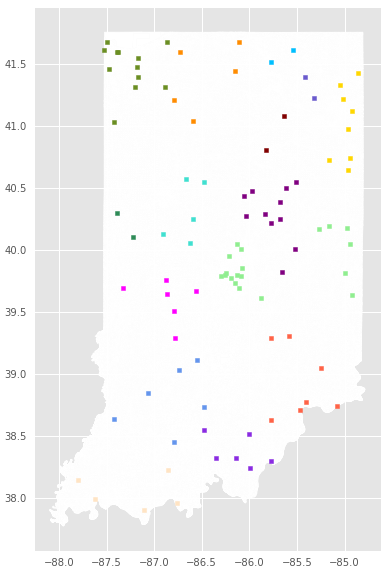

In [5]:
indiana = gpd.read_file('indianaShapeFile/tl_2010_18_tabblock10.shp')

if(numGroups==8):
    with plt.style.context(("seaborn", "ggplot")):
        indiana['geometry'].plot(figsize=(18,10),
                   color="white",
                   edgecolor = "white")
        plt.scatter(g0[1], g0[0], s=15, c='bisque', marker="s", label='first')
        plt.scatter(g1[1], g1[0], s=15, c='olivedrab', marker="s", label='first')
        plt.scatter(g2[1], g2[0], s=15, c='gold', marker="s", label='first')
        plt.scatter(g3[1], g3[0], s=15, c='lightgreen', marker="s", label='first')
        plt.scatter(g4[1], g4[0], s=15, c='darkorange', marker="s", label='first')
        plt.scatter(g5[1], g5[0], s=15, c='lightgreen', marker="s", label='first')
        plt.scatter(g6[1], g6[0], s=15, c='seagreen', marker="s", label='first')
        plt.scatter(g7[1], g7[0], s=15, c='turquoise', marker="s", label='first')
if(numGroups == 16 ):
    with plt.style.context(("seaborn", "ggplot")):
        indiana['geometry'].plot(figsize=(18,10),
               color="white",
               edgecolor = "white")
        plt.scatter(g0[1], g0[0], s=15, c='bisque', marker="s", label='first')
        plt.scatter(g1[1], g1[0], s=15, c='olivedrab', marker="s", label='first')
        plt.scatter(g2[1], g2[0], s=15, c='gold', marker="s", label='first')
        plt.scatter(g3[1], g3[0], s=15, c='lightgreen', marker="s", label='first')
        plt.scatter(g4[1], g4[0], s=15, c='darkorange', marker="s", label='first')
        plt.scatter(g5[1], g5[0], s=15, c='lightgreen', marker="s", label='first')
        plt.scatter(g6[1], g6[0], s=15, c='seagreen', marker="s", label='first')
        plt.scatter(g7[1], g7[0], s=15, c='turquoise', marker="s", label='first')
        plt.scatter(g8[1], g8[0], s=15, c='maroon', marker="s", label='first')
        plt.scatter(g9[1], g9[0], s=15, c='tomato', marker="s", label='first')
        plt.scatter(g10[1], g10[0], s=15, c='deepskyblue', marker="s", label='first')
        plt.scatter(g11[1], g11[0], s=15, c='cornflowerblue', marker="s", label='first')
        plt.scatter(g12[1], g12[0], s=15, c='slateblue', marker="s", label='first')
        plt.scatter(g13[1], g13[0], s=15, c='purple', marker="s", label='first')
        plt.scatter(g14[1], g14[0], s=15, c='blueviolet', marker="s", label='first')
        plt.scatter(g15[1], g15[0], s=15, c='magenta', marker="s", label='first')

Now, let's see what actual sectionals would look like on real data. Here, we've used the clusters generated from the sameSize file. 

In [6]:
# Time to make sense of the output from same size k means
text_file = open("sameSizeClustered.txt", "r")
lines = text_file.readlines()
text_file.close()
lines = lines[1:99]
n = len(lines)

data = []

for i in range(n):
    data.append(0)
for i in range(n):
    temp = lines[i].split("{")
    temp = temp[1]
    temp =  temp.split("}")[0]
    temp = temp.split(":")
    temp = temp[1:4]
    c = temp[2]
    x = temp[0].split(",")[0]
    y = temp[1].split(",")[0]
    data[i] = (float(x),float(y),int(c))
    

The plotting process looks a bit different because the output from sameSize.ts is a bit different from the output of kMeansTesting2.ts, but we get the same sort of plot in the end. We also fill the empty array n with the number of schools in each sectional for later use.

[7. 7. 4. 7. 3. 6. 5. 7. 7. 6. 6. 7. 5. 7. 7. 7.]


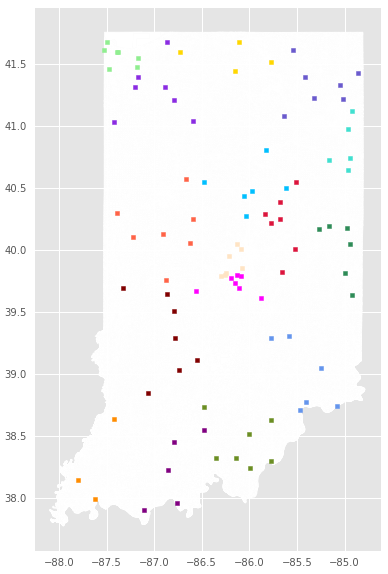

In [7]:
n = np.zeros(16)
indiana = gpd.read_file('indianaShapeFile/tl_2010_18_tabblock10.shp')
with plt.style.context(("seaborn", "ggplot")):
    indiana['geometry'].plot(figsize=(18,10),
               color="white",
               edgecolor = "white")
    for i in range(len(data)):
        if data[i][2] == 0:
            plt.scatter(data[i][1], data[i][0], s=15, c='bisque', marker="s", label='first')
            n[0] += 1
        if data[i][2] == 1:
            plt.scatter(data[i][1], data[i][0], s=15, c='olivedrab', marker="s", label='first')
            n[1] += 1
        if data[i][2] == 2:
            plt.scatter(data[i][1], data[i][0], s=15, c='gold', marker="s", label='first')
            n[2] += 1
        if data[i][2] == 3:
            plt.scatter(data[i][1], data[i][0], s=15, c='lightgreen', marker="s", label='first')
            n[3] += 1
        if data[i][2] == 4:
            plt.scatter(data[i][1], data[i][0], s=15, c='darkorange', marker="s", label='first')
            n[4] += 1
        if data[i][2] == 5:
            plt.scatter(data[i][1], data[i][0], s=15, c='seagreen', marker="s", label='first')
            n[5] += 1
        if data[i][2] == 6:
            plt.scatter(data[i][1], data[i][0], s=15, c='turquoise', marker="s", label='first')
            n[6] += 1
        if data[i][2] == 7:
            plt.scatter(data[i][1], data[i][0], s=15, c='maroon', marker="s", label='first')
            n[7] += 1
        if data[i][2] == 8:
            plt.scatter(data[i][1], data[i][0], s=15, c='tomato', marker="s", label='first')
            n[8] += 1
        if data[i][2] == 9:
            plt.scatter(data[i][1], data[i][0], s=15, c='deepskyblue', marker="s", label='first')
            n[9] += 1
        if data[i][2] == 10:
            plt.scatter(data[i][1], data[i][0], s=15, c='cornflowerblue', marker="s", label='first')
            n[10] += 1
        if data[i][2] == 11:
            plt.scatter(data[i][1], data[i][0], s=15, c='slateblue', marker="s", label='first')
            n[11] += 1
        if data[i][2] == 12:
            plt.scatter(data[i][1], data[i][0], s=15, c='purple', marker="s", label='first')
            n[12] += 1
        if data[i][2] == 13:
            plt.scatter(data[i][1], data[i][0], s=15, c='blueviolet', marker="s", label='first')
            n[13] += 1
        if data[i][2] == 14:
            plt.scatter(data[i][1], data[i][0], s=15, c='magenta', marker="s", label='first')
            n[14] += 1
        if data[i][2] == 15:
            plt.scatter(data[i][1], data[i][0], s=15, c='crimson', marker="s", label='first')
            n[15] += 1
print(n)

Now, we want to see whether these clusters are reasonable by looking at approximate intracluster driving times. We do this by using the free API, OpenStreetMap.

In [5]:
#Here's how you use OpenStreetMap
lon_1 = data[0][1]
lat = data[0][0]
lon_2 = data[1][1]
lat_2 = data[1][0]
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat};{lon_2},{lat_2}?overview=false""")
# then you load the response using the json libray
# by default you get only one alternative so you access 0-th element of the `routes`
routes = json.loads(r.content)
route_1 = routes.get("routes")[0]
route_1["duration"] # in seconds

Now that we have an idea of how OSM works, let's use it on our data. First, we'll build an array to store the data in an easier format to work with.

In [8]:
drive = np.zeros(16)
n0 = []
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []
n8 = []
n9 = []
n10 = []
n11 = []
n12 = []
n13 = []
n14 = []
n15 = []
for i in range(len(data)):
        if data[i][2] == 0:
            n0.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 1:
            n1.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 2:
            n2.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 3:
            n3.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 4:
            n4.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 5:
            n5.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 6:
            n6.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 7:
            n7.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 8:
            n8.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 9:
            n9.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 10:
            n10.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 11:
            n11.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 12:
            n12.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 13:
            n13.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 14:
            n14.append(tuple((data[i][0],data[i][1])))
        if data[i][2] == 15:
            n15.append(tuple((data[i][0],data[i][1])))
bign = []
bign.append(n0)
bign.append(n1)
bign.append(n2)
bign.append(n3)
bign.append(n4)
bign.append(n5)
bign.append(n6)
bign.append(n7)
bign.append(n8)
bign.append(n9)
bign.append(n10)
bign.append(n11)
bign.append(n12)
bign.append(n13)
bign.append(n14)
bign.append(n15)
print(bign[15])

[(40.2521566, -85.6783201), (40.5462021, -85.5079116), (39.8224805, -85.6577423), (40.2900924, -85.8353459), (40.2199448, -85.7723113), (40.384526, -85.6763689), (40.0059557, -85.5245303)]


Now, to get the driving times.

In [ ]:
test = np.zeros(16)
k = len(n)
for i in range(k):
    print("IIIIII: ",i)
    p = int(n[i])
    l = bign[i]
    for j in range(p):
        for k in range(j,p):
            if(j!=k):
#                 print(j,k)
#                 print(l[j][1],l[j][0])
#                 print(l[k][1],l[k][0])
                r1 = requests.get(f"http://router.project-osrm.org/route/v1/car/{l[j][1]},{l[j][0]};{l[k][1]},{l[k][0]}?overview=false""")
                routes1 = json.loads(r1.content)
                route1 = routes1.get("routes")[0]
                test[i] += route1["duration"] # in seconds
print(test)

IIIIII:  0
IIIIII:  1
IIIIII:  2
IIIIII:  3
IIIIII:  4
IIIIII:  5
IIIIII:  6
IIIIII:  7
IIIIII:  8
IIIIII:  9


The last step is to find the average driving time in each cluster and convert it to minutes. Then, the $i^{th}$ element of times will correspond to the average diving time for cluster $i$.

In [4]:
times = np.zeros(16)
for i in range(16):
    denominator = 60*n[i]*(n[i]-1)/2
    times[i] = test[i]/denominator
print(times)

NameError: name 'n' is not defined